# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import plotly.express as px
import seaborn as sns
from scipy import stats
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Import Data

In [2]:
#Import the dataset
df = pd.read_csv("can_in_diabetic_patients_dataset.csv")

In [3]:
#check sample data
df.head(5)

Unnamed: 0  SEX?M1F2?   AGE  First Visit  disease duration  \
0           0        1.0  55.0       2013.0               2.0   
1           1        1.0  34.0       2014.0               1.0   
2           2        1.0  57.0       2014.0               1.0   
3           3        1.0  57.0       2015.0               0.0   
4           4        1.0  54.0       2014.0               1.0   

   disease duration less than 5 years?1=yes?2=no?   BMI  HbA1c  \
0                                             1.0  23.0    8.1   
1                                             1.0  29.0    NaN   
2                                             1.0   NaN    NaN   
3                                             1.0  26.0    NaN   
4                                             1.0  24.0    8.9   

   Diagnosis Group  HRB   HRS  Valsalva  HRB(Positive=1?Negative=2)  \
0              1.0  1.0  12.0     1.109                         1.0   
1              1.0  9.0  17.0     1.191                         1.0   
2              1.0  9.0  22.0     1.113                         1.0   
3              1.0  7.0   5.0     1.094                         1.0   
4              1.0  6.0  14.0     1.183                         1.0   

   HRS(Positive=1?Negative=2)  Valsalva(Positive=1?Negative=2)  CANRS    FC  \
0                         1.0                              1.0   24.0  79.0   
1                         2.0                              1.0   21.0  50.0   
2                         2.0                              1.0   25.0  83.0   
3                         1.0                              1.0   23.0  86.0   
4                         1.0                              1.0   18.0  86.5   

     HC  outcome  
0  58.0        1  
1  79.5        1  
2  79.0        1  
3  76.5        1  
4  68.5        1

In [4]:
#Identify the size of the dataset
df.shape

(873, 19)

In [5]:
#Identify Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      873 non-null    int64  
 1   SEX?M1F2?                                       866 non-null    float64
 2   AGE                                             830 non-null    float64
 3   First Visit                                     707 non-null    float64
 4   disease duration                                702 non-null    float64
 5   disease duration less than 5 years?1=yes?2=no?  723 non-null    float64
 6   BMI                                             690 non-null    float64
 7   HbA1c                                           502 non-null    float64
 8   Diagnosis Group                                 867 non-null    float64
 9   HRB                                        

In [6]:
# Identify the %age of null values in the dataset
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

Unnamed: 0                                         0.00
SEX?M1F2?                                          0.80
AGE                                                4.93
First Visit                                       19.01
disease duration                                  19.59
disease duration less than 5 years?1=yes?2=no?    17.18
BMI                                               20.96
HbA1c                                             42.50
Diagnosis Group                                    0.69
HRB                                                1.03
HRS                                                0.57
Valsalva                                           1.83
HRB(Positive=1?Negative=2)                         1.03
HRS(Positive=1?Negative=2)                         0.92
Valsalva(Positive=1?Negative=2)                    0.80
CANRS                                              1.03
FC                                                11.45
HC                                              

# Data Cleaning

In [7]:
# Drpping a column as it has no relevant information.
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
# Renaming the columns in the dataset for legibility.
df.columns = ['gender', 'age', 'firstVisit', 'diseaseDuration', 'durationLessThanFiveYears', 'bmi','haemoglobin','diagnosisGroup', 'hrbTest', 'hrsTest', 'valsalvaTest', 'hrbResult', 'hrsResult', 'valsalvaResult', 'CANRiskScore', 'handConductance', 'footConductance', 'outcome']

In [9]:
# Converting all columns to numeric values
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['firstVisit'] = pd.to_numeric(df['firstVisit'], errors='coerce')
df['diseaseDuration'] = pd.to_numeric(df['diseaseDuration'], errors='coerce')
df['durationLessThanFiveYears'] = pd.to_numeric(df['durationLessThanFiveYears'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['haemoglobin'] = pd.to_numeric(df['haemoglobin'], errors='coerce')
df['diagnosisGroup'] = pd.to_numeric(df['diagnosisGroup'], errors='coerce')
df['hrbTest'] = pd.to_numeric(df['hrbTest'], errors='coerce')
df['hrsTest'] = pd.to_numeric(df['hrsTest'], errors='coerce')
df['valsalvaTest'] = pd.to_numeric(df['valsalvaTest'], errors='coerce')
df['hrbResult'] = pd.to_numeric(df['hrbResult'], errors='coerce')
df['hrsResult'] = pd.to_numeric(df['hrsResult'], errors='coerce')
df['valsalvaResult'] = pd.to_numeric(df['valsalvaResult'], errors='coerce')
df['CANRiskScore'] = pd.to_numeric(df['CANRiskScore'], errors='coerce')
df['handConductance'] = pd.to_numeric(df['handConductance'], errors='coerce')
df['footConductance'] = pd.to_numeric(df['footConductance'], errors='coerce')

In [10]:
# Output of the above actions
df.head()

gender   age  firstVisit  diseaseDuration  durationLessThanFiveYears   bmi  \
0     1.0  55.0      2013.0              2.0                        1.0  23.0   
1     1.0  34.0      2014.0              1.0                        1.0  29.0   
2     1.0  57.0      2014.0              1.0                        1.0   NaN   
3     1.0  57.0      2015.0              0.0                        1.0  26.0   
4     1.0  54.0      2014.0              1.0                        1.0  24.0   

   haemoglobin  diagnosisGroup  hrbTest  hrsTest  valsalvaTest  hrbResult  \
0          8.1             1.0      1.0     12.0         1.109        1.0   
1          NaN             1.0      9.0     17.0         1.191        1.0   
2          NaN             1.0      9.0     22.0         1.113        1.0   
3          NaN             1.0      7.0      5.0         1.094        1.0   
4          8.9             1.0      6.0     14.0         1.183        1.0   

   hrsResult  valsalvaResult  CANRiskScore  handConductance  footConductance  \
0        1.0             1.0          24.0             79.0             58.0   
1        2.0             1.0          21.0             50.0             79.5   
2        2.0             1.0          25.0             83.0             79.0   
3        1.0             1.0          23.0             86.0             76.5   
4        1.0             1.0          18.0             86.5             68.5   

   outcome  
0        1  
1        1  
2        1  
3        1  
4        1

# Replacing NaN Values

In [11]:
# Creating a list of all numeric columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# Since the dataset has only numerical data, we can use 
# the median of each column as a replacement of NaN values

def median_value_imputation(feature):
    median = df[feature].median()
    df[feature] = df[feature].fillna(median)

for col in num_cols:
    median_value_imputation(col)

In [13]:
# Checking for null values in the dataset
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

gender                       0.0
age                          0.0
firstVisit                   0.0
diseaseDuration              0.0
durationLessThanFiveYears    0.0
bmi                          0.0
haemoglobin                  0.0
diagnosisGroup               0.0
hrbTest                      0.0
hrsTest                      0.0
valsalvaTest                 0.0
hrbResult                    0.0
hrsResult                    0.0
valsalvaResult               0.0
CANRiskScore                 0.0
handConductance              0.0
footConductance              0.0
outcome                      0.0
dtype: float64

# Exploratory Data Analysis

In [14]:
# Analysing the Distribution of Features

# Since most of the features will assume a normal distribution after the removal of outliers,
# scaling is not necessary.

import plotly.graph_objects as go
fig = go.Figure([go.Histogram(x = df['CANRiskScore'])])
fig.show()

In [15]:
fig = go.Figure([go.Histogram(x = df['diseaseDuration'])])
fig.show()

In [16]:
fig = go.Figure([go.Histogram(x = df['handConductance'])])
fig.show()

In [17]:
# Analysing the correlation between features

# There doesn't seem to be a stong correlation among features except for the CANRiskScore and outcome correlation.
# However, this does not mean that there is no relationship between the features, it only rules out
# linear relationships. 

import plotly.graph_objects as go
df_px = df[num_cols]
fig = px.imshow(df_px.corr())
fig.show()

In [18]:
df_corr = df.corr()
round(df_corr,2)

gender   age  firstVisit  diseaseDuration  \
gender                       1.00  0.03       -0.09            -0.07   
age                          0.03  1.00       -0.06             0.00   
firstVisit                  -0.09 -0.06        1.00            -0.08   
diseaseDuration             -0.07  0.00       -0.08             1.00   
durationLessThanFiveYears    0.06  0.02       -0.10             0.10   
bmi                         -0.04 -0.03       -0.00            -0.06   
haemoglobin                 -0.03  0.01       -0.00             0.02   
diagnosisGroup              -0.01 -0.02       -0.06            -0.03   
hrbTest                      0.03 -0.01       -0.08             0.00   
hrsTest                     -0.07 -0.03       -0.02            -0.01   
valsalvaTest                -0.02  0.00        0.00            -0.01   
hrbResult                   -0.01 -0.03       -0.05            -0.02   
hrsResult                   -0.02 -0.06        0.01            -0.04   
valsalvaResult               0.08  0.01       -0.07            -0.03   
CANRiskScore                -0.04  0.08        0.03             0.02   
handConductance             -0.06 -0.02        0.03            -0.00   
footConductance             -0.04  0.01        0.06            -0.05   
outcome                      0.00  0.05        0.04             0.05   

                           durationLessThanFiveYears   bmi  haemoglobin  \
gender                                          0.06 -0.04        -0.03   
age                                             0.02 -0.03         0.01   
firstVisit                                     -0.10 -0.00        -0.00   
diseaseDuration                                 0.10 -0.06         0.02   
durationLessThanFiveYears                       1.00 -0.07         0.02   
bmi                                            -0.07  1.00         0.06   
haemoglobin                                     0.02  0.06         1.00   
diagnosisGroup                                  0.02 -0.03        -0.07   
hrbTest                                        -0.07  0.02        -0.01   
hrsTest                                        -0.03  0.04        -0.00   
valsalvaTest                                   -0.00 -0.03        -0.01   
hrbResult                                      -0.00 -0.01         0.02   
hrsResult                                      -0.01 -0.01         0.01   
valsalvaResult                                  0.03 -0.01        -0.00   
CANRiskScore                                    0.06 -0.00         0.00   
handConductance                                 0.02  0.02        -0.08   
footConductance                                -0.07  0.00         0.02   
outcome                                         0.02  0.02         0.01   

                           diagnosisGroup  hrbTest  hrsTest  valsalvaTest  \
gender                              -0.01     0.03    -0.07         -0.02   
age                                 -0.02    -0.01    -0.03          0.00   
firstVisit                          -0.06    -0.08    -0.02          0.00   
diseaseDuration                     -0.03     0.00    -0.01         -0.01   
durationLessThanFiveYears            0.02    -0.07    -0.03         -0.00   
bmi                                 -0.03     0.02     0.04         -0.03   
haemoglobin                         -0.07    -0.01    -0.00         -0.01   
diagnosisGroup                       1.00     0.10     0.05          0.06   
hrbTest                              0.10     1.00    -0.02          0.10   
hrsTest                              0.05    -0.02     1.00          0.03   
valsalvaTest                         0.06     0.10     0.03          1.00   
hrbResult                            0.05     0.10     0.03         -0.04   
hrsResult                            0.08    -0.04     0.08          0.04   
valsalvaResult                       0.10     0.02     0.05          0.05   
CANRiskScore                        -0.05    -0.05    -0.02          0.06   


In [19]:
# Analysing the scatterplots for different features

df_px = df[['CANRiskScore', 'hrsTest', 'hrbTest', 'valsalvaTest', 'diseaseDuration']]
fig = px.scatter_matrix(df_px, 
    dimensions = ['hrsTest', 'hrbTest', 'valsalvaTest', 'diseaseDuration'],
    color="CANRiskScore")
fig.show()

D:\Data\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



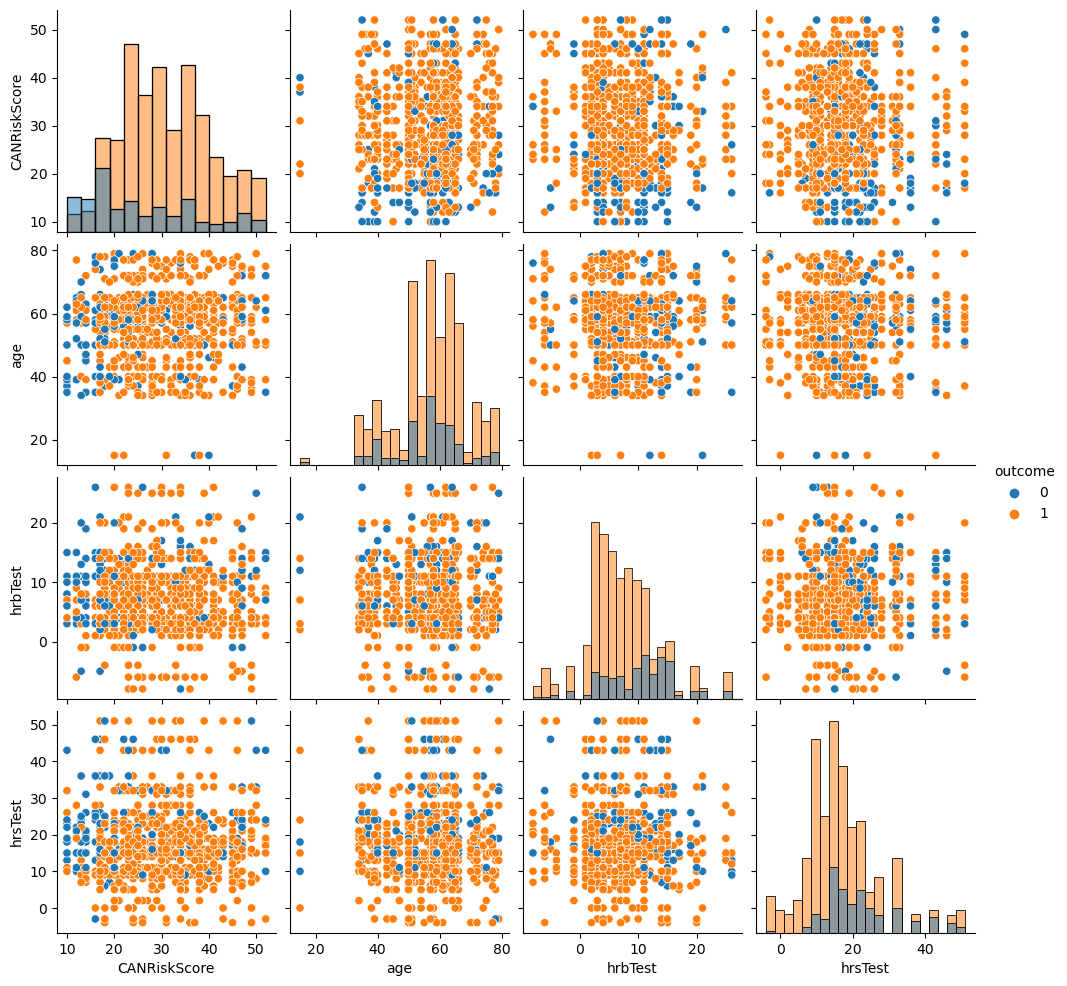

In [20]:
# Analysis of pairplots of different features to get an idea of the data

sns.pairplot(df, vars=['CANRiskScore', 'age', 'hrbTest', 'hrsTest'], diag_kind='hist',hue="outcome")

# Removing Outliers

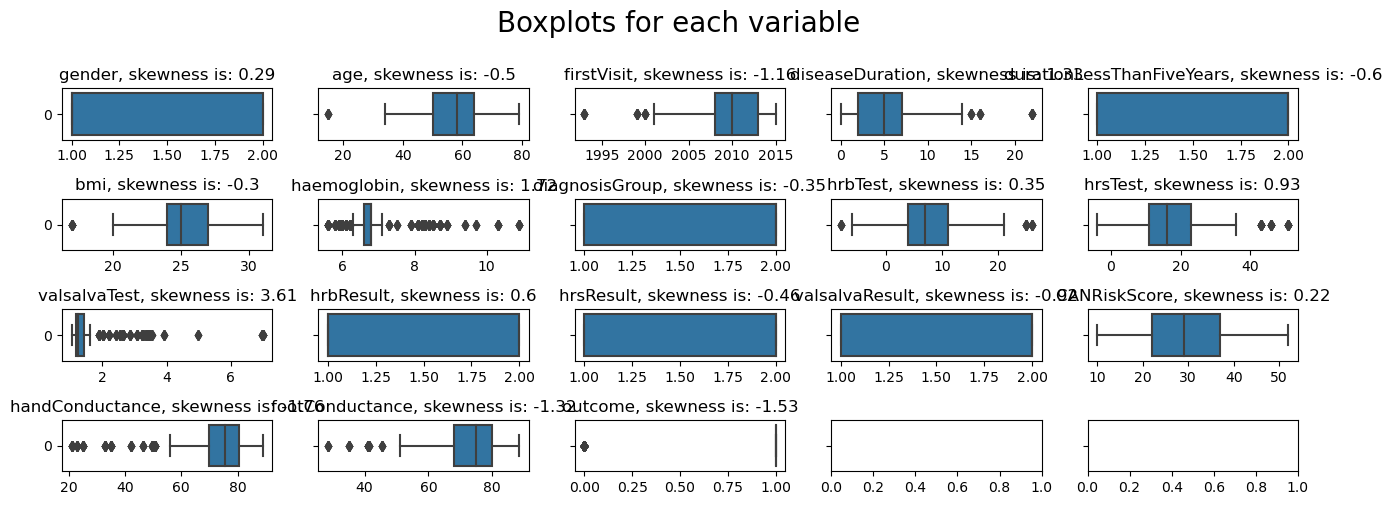

In [21]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=20)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))    
boxplots_custom(dataset=df, columns_list=num_cols, rows=4, cols=5, suptitle='Boxplots for each variable')
plt.tight_layout()

In [22]:
#Removing outliers in 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['age']=np.where(df['age']>upper_whisker,upper_whisker,np.where(df['age']<lower_whisker,lower_whisker,df['age']))

#Removing outliers
Q1 = df['firstVisit'].quantile(0.25)
Q3 = df['firstVisit'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['firstVisit']=np.where(df['firstVisit']>upper_whisker,upper_whisker,np.where(df['firstVisit']<lower_whisker,lower_whisker,df['firstVisit']))

#Removing outliers
Q1 = df['diseaseDuration'].quantile(0.25)
Q3 = df['diseaseDuration'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['diseaseDuration']=np.where(df['diseaseDuration']>upper_whisker,upper_whisker,np.where(df['diseaseDuration']<lower_whisker,lower_whisker,df['diseaseDuration']))

#Removing outliers
Q1 = df['durationLessThanFiveYears'].quantile(0.25)
Q3 = df['durationLessThanFiveYears'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['durationLessThanFiveYears']=np.where(df['durationLessThanFiveYears']>upper_whisker,upper_whisker,np.where(df['durationLessThanFiveYears']<lower_whisker,lower_whisker,df['durationLessThanFiveYears']))

#Removing outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['bmi']=np.where(df['bmi']>upper_whisker,upper_whisker,np.where(df['bmi']<lower_whisker,lower_whisker,df['bmi']))

#Removing outliers
Q1 = df['haemoglobin'].quantile(0.25)
Q3 = df['haemoglobin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['haemoglobin']=np.where(df['haemoglobin']>upper_whisker,upper_whisker,np.where(df['haemoglobin']<lower_whisker,lower_whisker,df['haemoglobin']))


#Removing outliers
Q1 = df['hrbTest'].quantile(0.25)
Q3 = df['hrbTest'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['hrbTest']=np.where(df['hrbTest']>upper_whisker,upper_whisker,np.where(df['hrbTest']<lower_whisker,lower_whisker,df['hrbTest']))

#Removing outliers 
Q1 = df['hrsTest'].quantile(0.25)
Q3 = df['hrsTest'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['hrsTest']=np.where(df['hrsTest']>upper_whisker,upper_whisker,np.where(df['hrsTest']<lower_whisker,lower_whisker,df['hrsTest']))

#Removing outliers
Q1 = df['valsalvaTest'].quantile(0.25)
Q3 = df['valsalvaTest'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['valsalvaTest']=np.where(df['valsalvaTest']>upper_whisker,upper_whisker,np.where(df['valsalvaTest']<lower_whisker,lower_whisker,df['valsalvaTest']))

#Removing outliers
Q1 = df['handConductance'].quantile(0.25)
Q3 = df['handConductance'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['handConductance']=np.where(df['handConductance']>upper_whisker,upper_whisker,np.where(df['handConductance']<lower_whisker,lower_whisker,df['handConductance']))

#Removing outliers
Q1 = df['footConductance'].quantile(0.25)
Q3 = df['footConductance'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['footConductance']=np.where(df['footConductance']>upper_whisker,upper_whisker,np.where(df['footConductance']<lower_whisker,lower_whisker,df['footConductance']))


# Dataset Imbalance Testing before Modelling

<Axes: xlabel='index', ylabel='outcome'>

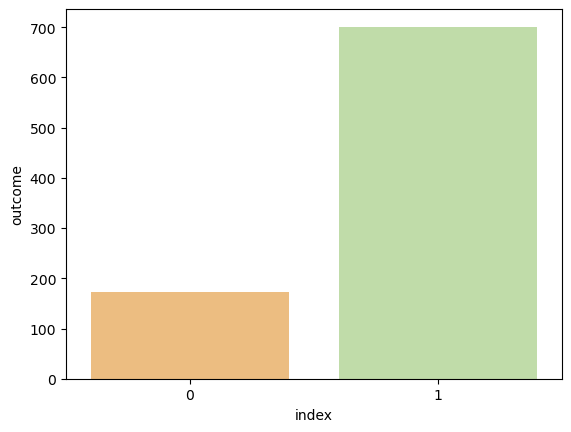

In [23]:
xx=df['outcome'].value_counts().reset_index()
sns.barplot(x='index', y='outcome', data=xx, palette='Spectral')

# The dataset seems to be imbalanced quite a lot in favour of the value 1 (Diagnosed as a CAN patient)
# If the data is fed to an ML model as it is, the precision and recall for the value 0 would be devastating.
# Therefore, we need to modify the dataset for a better prediction result.

# Modelling

In [28]:
# Splitting the dataset into test and train datasets for evaluating the model
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.15, random_state = 42)

In [33]:
ind_col = [col for col in df.columns if col != 'outcome']
dep_col = 'outcome'

X = df[ind_col]
y = df[dep_col]

X_test = df_test[ind_col]
y_test = df_test[dep_col]

In [34]:
# Balancing the dataset using the oversampling technique before feeding it into the model
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: xlabel='index', ylabel='outcome'>

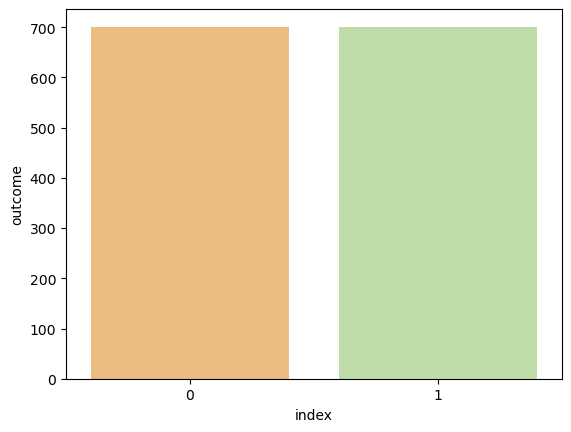

In [32]:
# Visualizing the dataset after the oversampling modification

xx=df['outcome'].value_counts().reset_index()
sns.barplot(x='index', y='outcome', data=xx, palette='Spectral')

In [35]:
print(X.shape)
print(X_test.shape)

(1402, 17)
(131, 17)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_valid, dtc.predict(X_valid))
dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc_test} \n")
print(f"Validation Accuracy of Decision Tree Classifier is {accuracy_score(y_valid, dtc.predict(X_valid))}")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, dtc.predict(X_valid))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, dtc.predict(X_valid))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9923664122137404 

Validation Accuracy of Decision Tree Classifier is 0.9750889679715302
Confusion Matrix :- 
[[127   2]
 [  5 147]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.99      0.97      0.98       152

    accuracy                           0.98       281
   macro avg       0.97      0.98      0.97       281
weighted avg       0.98      0.98      0.98       281



In [38]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [2, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 11, n_jobs = -1, verbose = 1, error_score='raise')
grid_search_dtc.fit(X_train, y_train)
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

Fitting 11 folds for each of 768 candidates, totalling 8448 fits
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.9428972308995607


D:\Data\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



In [39]:
dtc = grid_search_dtc.best_estimator_

print(dtc)

# accuracy score, confusion matrix and classification report of grid search

dtc_gs_acc = accuracy_score(y_valid, dtc.predict(X_valid))
dtc_gs_acc_test = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_gs_acc_test}")
print(f"Validation Accuracy of Decision Tree Classifier is {accuracy_score(y_valid, dtc.predict(X_valid))} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, dtc.predict(X_valid))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, dtc.predict(X_valid))}")

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=2)
Training Accuracy of Decision Tree Classifier is 0.9687778768956289
Test Accuracy of Decision Tree Classifier is 0.9312977099236641
Validation Accuracy of Decision Tree Classifier is 0.8932384341637011 

Confusion Matrix :- 
[[121   8]
 [ 22 130]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       129
           1       0.94      0.86      0.90       152

    accuracy                           0.89       281
   macro avg       0.89      0.90      0.89       281
weighted avg       0.90      0.89      0.89       281



                      feature  importance
11                  hrbResult    0.231603
7              diagnosisGroup    0.146336
10               valsalvaTest    0.122713
9                     hrsTest    0.114379
8                     hrbTest    0.094306
16            footConductance    0.051297
14               CANRiskScore    0.048482
12                  hrsResult    0.041194
1                         age    0.027584
2                  firstVisit    0.024116
5                         bmi    0.021363
3             diseaseDuration    0.017505
15            handConductance    0.017079
0                      gender    0.014421
6                 haemoglobin    0.013711
4   durationLessThanFiveYears    0.012570
13             valsalvaResult    0.001340


Text(0.5, 1.0, 'Feature Importance')

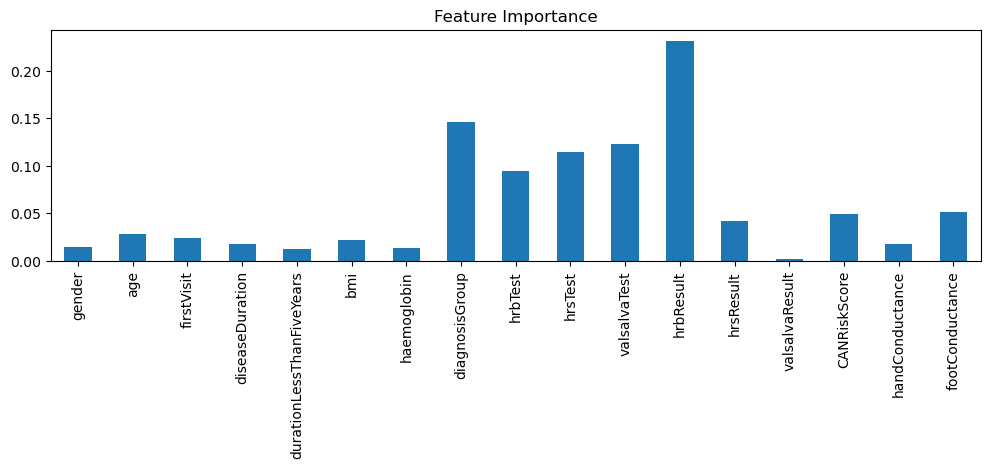

In [40]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = dtc.feature_importances_.tolist()
ft_imp = pd.DataFrame()
ft_imp['feature'] = features
ft_imp['importance'] = importance
ft_imp.sort_values(by=['importance'], ascending = False, inplace=True)
print(ft_imp)
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [41]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 7, n_estimators = 12)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_valid, rd_clf.predict(X_valid))
rd_clf_acc_test = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc_test} \n")
print(f"Validation Accuracy of Random Forest Classifier is {accuracy_score(y_valid, rd_clf.predict(X_valid))}")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, rd_clf.predict(X_valid))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, rd_clf.predict(X_valid))}")

Training Accuracy of Random Forest Classifier is 0.9955396966993756
Test Accuracy of Random Forest Classifier is 0.9770992366412213 

Validation Accuracy of Random Forest Classifier is 0.9893238434163701
Confusion Matrix :- 
[[126   3]
 [  0 152]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.98      1.00      0.99       152

    accuracy                           0.99       281
   macro avg       0.99      0.99      0.99       281
weighted avg       0.99      0.99      0.99       281



D:\Data\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

